- can draw all kinds of models other than a straight line. 
- 

- Parabala - concave function. 2 points never cross the line of itself. 
    - concave with maximum of curve at top (cave entrance)
    - convex U shape.
    - only one max/min
    
- when a ploynomial of $x^3$ or more
    - one global maximum height of overall shape
    - local maximum is best within that section of curve
- we can play around with multipliers of $X^2$ such as $\frac{1}{2}X^2$ to speed up and slow down slope.    

- with a 2nd order polynomial, the beta_1  rotates/tilts the curve.
- any set of data can have a section mapped to the parabola and from that slope we can understand the rate of increase or decrease. 

- if we slice up a section of the cubic curve we can very closely recreate the same curve with a parabola
    - we can create a parabola that closely matches almost any data. 
    
- what's awesome about $X^3$ is the inflection point where 2 points can cross the line. 
    - again we can create any bend we want and any rate increase etc. 
    
#### Exercise: try plotting each separately - $y=\beta_0$, $y=\beta_1 X$, $y=\beta_2 X^2$, $y=\beta_3 X^3$ then combine and make a 5th plot $\beta_0 + \beta_1 X + \beta_1 X^2 + \beta_3 X^3$
- what this shows is how each portion of the term will act on the line, such as tilt, curve, etc. 
- should go from level straight line to a straight line at an angle, to a parabola, to 


- Regularization: is for controlling the complexity of the model
    - a dial that controls complexity of the model
    - object is to control complexity
    - through regularization we will ask after each model creation is this the model that creates the best fit, produces the best optimal outcome. 
    - think abbout knn, increasing k makes for a more democratic model and it will not be as sporadic. 
    - if we go with a small k, then we can get more sporadic aka a more responsive model to data input. 
    - regularization limits model flexibility aka complexity
    - random forest increasing regularization is increasing K prime. because we can't over fit or fit closely small k prime models. 

    - there is no mechanism or information in the model that specifies which polynomial to use, so we have to try different algorithms and fit the model but the MSE will get lower and lower as more terms are added because the model is more flexible. This also becomes overfitting. 

Precision is read centric (review all metrics)

#### Method of Least squares
- used to find the fit of the model
- $\sigma $

- In order to interpret the model or ask stats questions, we need normality of the data so at each point of the line where y_hat is located points around it are normally distributed. if not, normall distributed around the y_hat, then we can't make statistical inferences about the model and predictions.

- We can use a hypothesis test to determine what order polynomial we want to use. if data is normal along y_hat model(line)
    - set \beta_5 to null hypothesis
    - compete \beta_4 and if significantly better then \beta_5, then use \beta_4
    
- with linear regression, we need to move up the chain of polynomials in order to get the curves we might need.
- additionally when we add another feature, we need to go through the same process again of figuring out size of polynomial that is best for the feature, and compete etc. 
    - it's a lot of work!!!!!!!
    


#### Big difference between Linear Regression and i.e. Random Forest
- Effect Curve available via the linear form
- effect curve can be calculated via the numeric calculation
- linear form is the effect curve.
- when you numerically draw an effect curve you are just drawing what the linear form says is happening. 


- There is a problem when we duplicate features: perfect correlation between 2 features. 
    - i.e. with a tree it will randomly select which feature to split on when they are they same, which then lowers the importance score because they each get used maybe 50/50 of the time, so other features can rise in importance. 
    - The same happens with linear models. 

- correlation means similarity between features. 

#### Term Linear Model Regression
- Linear because the coefficients are fixed constants that we don't square or perform any other math on other than multiply by the feature. 

- Regression - putting a line through data. 
    - comes from francis galton in 1886.




## Exercise:

- marginal effect plot for x_1 and x_2
- synergystic plot between x_1 and x_2


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


df = pd.read_csv('dataset/kc_house_data.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [38]:
# remove high end extreme sqft and bedroom rows to let the data be more normal. 
print(set(df['bedrooms']))
print(len(df[df['bedrooms']>6]))
df = df[df['bedrooms']<=6]
print(len(df[df['sqft_living']>6000]))
df = df[df['sqft_living']<=6000]

{0, 1, 2, 3, 4, 5, 6}
0
63


In [39]:
# get a subset of the data and convert to np.
X = df[['sqft_living', 'bedrooms']].as_matrix()
Y = df['price']

#### Make up my own model and change the beta coefficients to see how the effect curve changes. 
- The goal is to show how the effect curve is the coeffiencts and it is the model. 
- model to apply is:
    - $\beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_1X_2 + \beta_4X_1X_1$
    

In [148]:
def my_predict(features_np):
    b_0 = 4
    b_1 = .1
    b_2 = 19140
    b_3 = 5
    b_4 = -.1
#     b_4 = 7.894240738995193e-07
     
    prediction_list = []
    
    for feature in features_np:
        prediction_list.append(b_0 + b_1* feature[0] + b_2* feature[1] + \
                               b_3* feature[0] * feature[1] + b_4 * feature[0] * feature[0])
    
    return(prediction_list)
    

In [149]:
## by playing around with the average number of bedrooms and average sqrft, I am able to get a rough idea
# of how much to modify the coefficients. 
print(np.average(X[:,0]))
print(np.average(X[:,1]))
3.35/(2060*2060)

2060.1377513
3.35331347729


7.894240738995193e-07

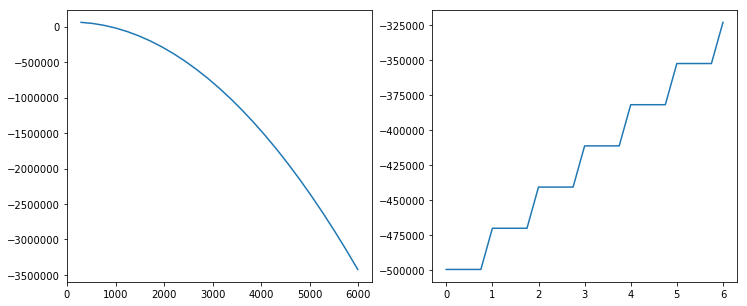

In [150]:
fig, axes = plt.subplots(1,2, figsize=[12,5])

support = np.linspace(min(X[:,0]),max(X[:,0]),25)
avg = []
for i in support:
    Xtmp = X.copy()
    Xtmp[:,0] = i    
    avg.append(np.mean(my_predict(Xtmp)))
    
axes[0].plot(support,avg)

support = np.linspace(min(X[:,1]),max(X[:,1]),25)
avg = []
for i in support:
    Xtmp = X.copy()
    Xtmp[:,1] = i    
    avg.append(np.mean(my_predict(Xtmp)))
    
axes[1].plot(support,avg)

#### Lesson Learned: Because the column of sqrft data was an int category when the np.array was created, new data assigned to that column is also converted to an int through rounding. So, the linspace for loop numbers with decimals are automatically rounded off into an int. Hence, the steps in the 2nd plot above rather than a smooth curve. 

In [151]:
g = np.meshgrid(np.linspace(min(X[:,0]),max(X[:,0]),20),np.linspace(min(X[:,1]),max(X[:,1]),20))
z = 0*g[0]
for xi in range(20):
    for yi in range(20):
        Xtmp = X.copy()
        Xtmp[:,0] = g[0][xi,yi]
        Xtmp[:,1] = g[1][xi,yi]
        z[xi,yi] = np.mean(my_predict(Xtmp))


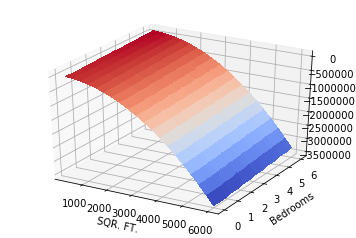

In [152]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(g[0], g[1], z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('SQR. FT.')
ax.set_ylabel('Bedrooms')

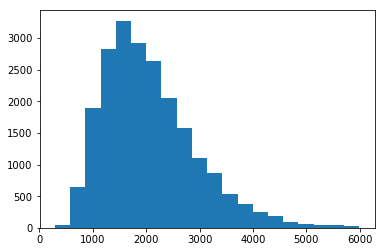

In [87]:
_ = plt.hist(X[:,0], bins=20) #historgram of sqrft data

## Exercise Use a Random Forest to see the effect curves when 2 features are nearly same in their predictive power of the outcome. 

- 1st Plot:
    - Use a column of continuous data. 
    - Create a y column off of the X feature by using a simple formula like 10x
        - Create an effect plot for x_1
- 2nd Plot/Exercise:
    - Add a 2nd feature based on the first x_1 column by adding some noise. X_1 + e.
        - Create an effect plot for X_2    
- 3rd Plot/Exercise
    - Using both X_1 and X_2 feature columns, fit the data. 
    - create effect plot for X_1
    - Create effecxt plot for X_2
    - Create correlation plot for X_1 and X_2
    

In [255]:
df = pd.read_csv('dataset/kc_house_data.csv')
# remove high end extreme sqft rows to let the data be more normal. 
print(len(df[df['sqft_living']>6000]))
df = df[df['sqft_living']<=6000]
# get a subset of the data and convert to np.
avg_sqft = np.average(df['sqft_living'])
df['sqft_with_error'] = [val + np.random.randint((-.6 * avg_sqft), (.6 * avg_sqft), 1)[0] \
                         for val in df['sqft_living']]

    
#### First a single feature X_1    
# X = df[['sqft_living', 'sqft_with_error']].as_matrix()
X = df[['sqft_living']].as_matrix()
# X = df[['sqft_with_error']].as_matrix()
Y = df['sqft_living'] *10


68


In [256]:
[print(np.random.randint(-30,30,1)[0]) for x in range(5)]

7
-24
-16
-26
-19


[None, None, None, None, None]

In [257]:
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [258]:
# parameters = {'max_features': list(range(1,X.shape[1]+1))}

parameters = {'max_features': [1]}
rf = RandomForestRegressor(n_estimators=80)
KK=5
models = GridSearchCV(estimator=rf, param_grid=parameters, cv=KK, scoring='neg_mean_squared_error')
models.fit(X, Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=80, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1, param_grid={'max_features': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

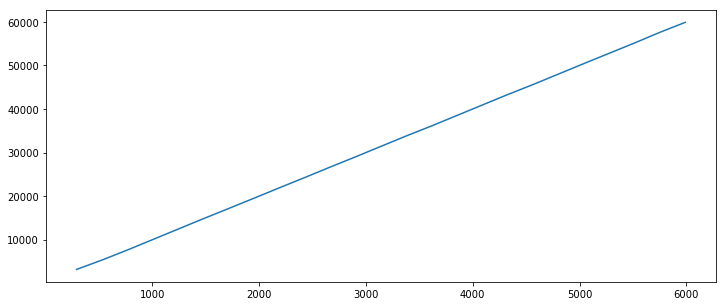

In [259]:
fig, axes = plt.subplots(1,1, figsize=[12,5])

support = np.linspace(min(X[:,0]),max(X[:,0]),25)
avg = []
for i in support:
    Xtmp = X.copy()
    Xtmp[:,0] = i    
    avg.append(np.mean(models.best_estimator_.predict(Xtmp)))
    
plt.plot(support,avg)


#### Now for 2nd Feature:
- X_1 with error noise

In [260]:
X = df[['sqft_with_error']].as_matrix()

# parameters = {'max_features': list(range(1,X.shape[1]+1))}

parameters = {'max_features': [1]}
rf = RandomForestRegressor(n_estimators=80)
KK=5
models = GridSearchCV(estimator=rf, param_grid=parameters, cv=KK, scoring='neg_mean_squared_error')
models.fit(X, Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=80, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1, param_grid={'max_features': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

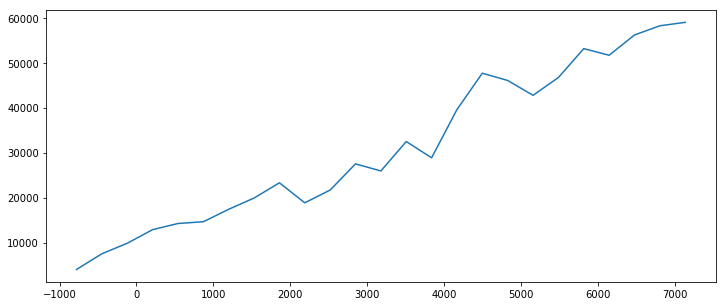

In [261]:
fig, axes = plt.subplots(1,1, figsize=[12,5])

support = np.linspace(min(X[:,0]),max(X[:,0]),25)
avg = []
for i in support:
    Xtmp = X.copy()
    Xtmp[:,0] = i    
    avg.append(np.mean(models.best_estimator_.predict(Xtmp)))
    
plt.plot(support,avg)

#### Now for both features:


In [284]:
X = df[['sqft_living', 'sqft_with_error']].as_matrix()

# parameters = {'max_features': list(range(1,X.shape[1]+1))}

parameters = {'max_features': [1, 2]}
rf = RandomForestRegressor(n_estimators=80)
KK=5
models = GridSearchCV(estimator=rf, param_grid=parameters, cv=KK, scoring='neg_mean_squared_error')
models.fit(X, Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=80, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

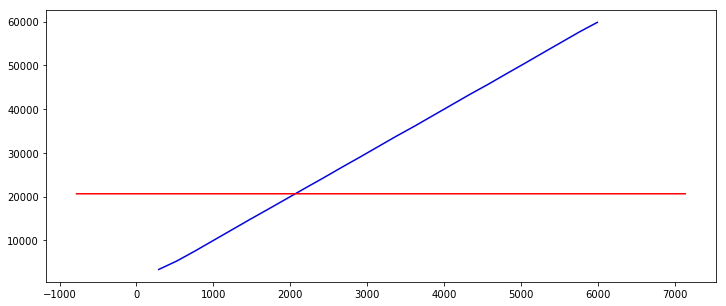

In [287]:
fig = plt.figure(figsize=[12,5])

support = np.linspace(min(X[:,0]),max(X[:,0]),25)
avg = []
for i in support:
    Xtmp = X.copy()
    Xtmp[:,0] = i    
    avg.append(np.mean(models.best_estimator_.predict(Xtmp)))
    
plt.plot(support,avg, color='b')

support = np.linspace(min(X[:,1]),max(X[:,1]),25)
avg = []
for i in support:
    Xtmp = X.copy()
    Xtmp[:,1] = i    
    avg.append(np.mean(models.best_estimator_.predict(Xtmp)))
    
_=plt.plot(support,avg, color='r')

array([[1180, 2154],
       [2570, 2476],
       [ 770, -425],
       ..., 
       [1020,  -68],
       [1600, 2216],
       [1020, 2164]])

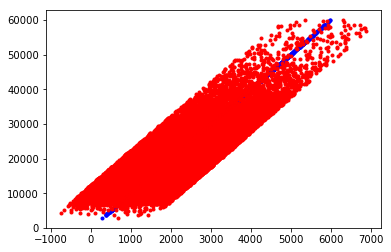

In [245]:
plt.plot(X[:,0],Y, "b.")
plt.plot(X[:,1],Y, "r.")
# plt.plot(X[:,1],X[:,0], "r.")
X

In [231]:
g = np.meshgrid(np.linspace(min(X[:,0]),max(X[:,0]),20),np.linspace(min(X[:,1]),max(X[:,1]),20))
z = 0*g[0]
for xi in range(20):
    for yi in range(20):
        Xtmp = X.copy()
        Xtmp[:,0] = g[0][xi,yi]
        Xtmp[:,1] = g[1][xi,yi]
        z[xi,yi] = np.mean(my_predict(Xtmp))


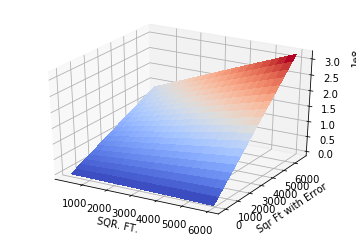

In [232]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(g[0], g[1], z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('SQR. FT.')
ax.set_ylabel('Sqr Ft with Error')

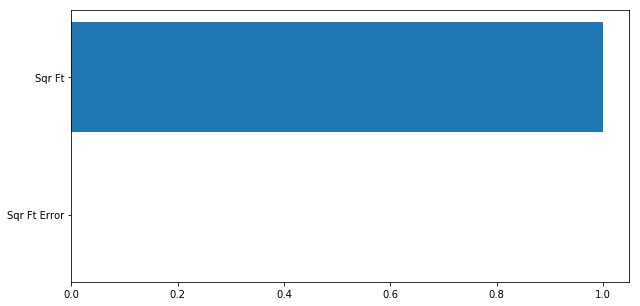

In [233]:
fig = plt.figure(figsize=(10,5))
s=np.argsort(models.best_estimator_.feature_importances_)
plt.barh(range(len(s)),width=models.best_estimator_.feature_importances_[s])
name_np_array = np.array(['Sqr Ft', 'Sqr Ft Error'])
# plt.tick_params(labelsize=68)
tmp=plt.yticks(range(X.shape[1]),name_np_array[s])

## 1st iteration used a Random Forest. 
## Compare results with a linear model regression
## Same Exercise of comparing 2 similar features. 

### Using the same data from above. 
- 1st with the sqft column
- 2nd with sqft column with noise/error added
- 3rd with both columns trained and tested.

In [ ]:
df = pd.read_csv('dataset/kc_house_data.csv')

# remove high end extreme sqft rows to let the data be more normal. 
print(len(df[df['sqft_living']>6000]))
df = df[df['sqft_living']<=6000]

# get a subset of the sqft data and convert to np, so error can be added based on a formula to a new column.
avg_sqft = np.average(df['sqft_living'])
df['sqft_with_error'] = [val + np.random.randint((-.6 * avg_sqft), (.6 * avg_sqft), 1)[0] \
                         for val in df['sqft_living']]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [274]:
### Use the following code change options to create the single feature or multi feature matrices
#### First the single feature as X_1 with data directly related to outcomes.   
# X = df[['sqft_living', 'sqft_with_error']].as_matrix()
X = df[['sqft_living']].as_matrix()
Y = df['sqft_living'] *10

# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

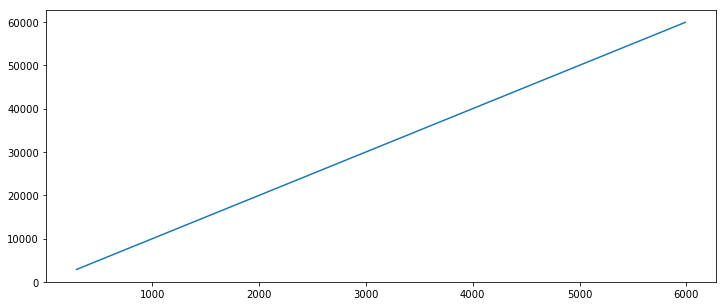

In [275]:
fig =  plt.figure(figsize=[12,5])

support = np.linspace(min(X[:,0]),max(X[:,0]),25)
avg = []
for i in support:
    Xtmp = X.copy()
    Xtmp[:,0] = i    
    avg.append(np.mean(regressor.predict(Xtmp)))
    
plt.plot(support,avg)

### Now Plot Linear Regression Effect curve with sqft with error added only.


In [278]:
### Use the following code change options to create the single feature or multi feature matrices
#### single feature as X_1 with data directly related to outcomes.   
# X = df[['sqft_living', 'sqft_with_error']].as_matrix()
X = df[['sqft_with_error']].as_matrix()
Y = df['sqft_living'] *10

# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

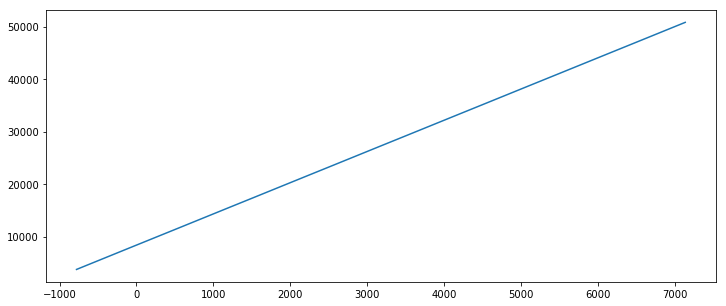

In [279]:
fig =  plt.figure(figsize=[12,5])

support = np.linspace(min(X[:,0]),max(X[:,0]),25)
avg = []
for i in support:
    Xtmp = X.copy()
    Xtmp[:,0] = i    
    avg.append(np.mean(regressor.predict(Xtmp)))
    
plt.plot(support,avg)

### Both Features sqft and sqft with error

In [280]:
### Use the following code change options to create the single feature or multi feature matrices
#### single feature as X_1 with data directly related to outcomes.   
X = df[['sqft_living', 'sqft_with_error']].as_matrix()
# X = df[['sqft_with_error']].as_matrix()
Y = df['sqft_living'] *10

# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

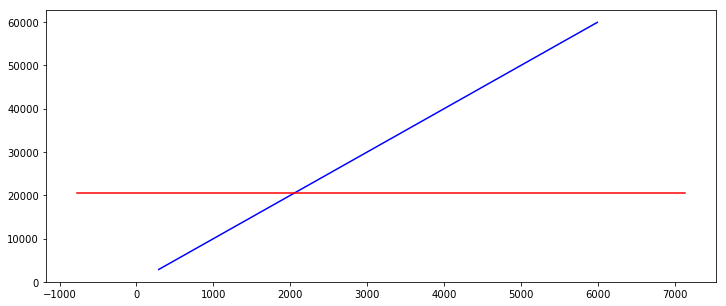

In [282]:
fig =  plt.figure(figsize=[12,5])

support = np.linspace(min(X[:,0]),max(X[:,0]),25)
avg = []
for i in support:
    Xtmp = X.copy()
    Xtmp[:,0] = i    
    avg.append(np.mean(regressor.predict(Xtmp)))
    
plt.plot(support,avg, color='b')

support = np.linspace(min(X[:,1]),max(X[:,1]),25)
avg = []
for i in support:
    Xtmp = X.copy()
    Xtmp[:,1] = i    
    avg.append(np.mean(regressor.predict(Xtmp)))
    
plt.plot(support,avg, color='r')


# What We've done so far: Interpreting Linear Forms
### 0. The Linear form (aka formula) drives the effect curve. Formula is the effect curve
### 1. Noise in the feature ($X_2$) (mismeasurement) - Effect curves for X1, X2, and X1 and X2 
- Linear model pulled the noisey line down toward the X (Atenuate, atenuated)
- RF recovered when the outcome (y) was linear.
    - might try with a parabola 
- 
### 2. multicolinearity, confundity, correlated features
- When 2 features are similar like this example where one feature was set to eqaul the 2nd feature, then they compete with each other as the tree is created at each split. 
    - what we can do is check a plot of both data points, if highly correlated, then we could lose some of the power of one to the other. 
    - once the correlation begins to split like we did above in #1 then the problem goes away. 
    
- In Random Forests, RF, Same happened with Linear Regression
    - clean measures end up beating out messy features when plotting both together in an effect curve.  

# Linear Model Interpretation
- 2 ways linear model fails
    - Influence
    
